In [1]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms

In [6]:
data_dir = '/Users/sunxiaolei/Python_Projects/Deeplearning/experiment_three'

In [7]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [8]:
batch_size = 64
trainset = datasets.FashionMNIST(root=data_dir, download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = datasets.FashionMNIST(root=data_dir, download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

In [9]:
images, labels = next(iter(trainloader))

In [10]:
images.shape

torch.Size([64, 1, 28, 28])

In [11]:
labels.shape

torch.Size([64])

In [12]:
index = 0
image = images[index]
label = labels[index]

In [13]:
image.shape

torch.Size([1, 28, 28])

这张图片对应的标签是T恤


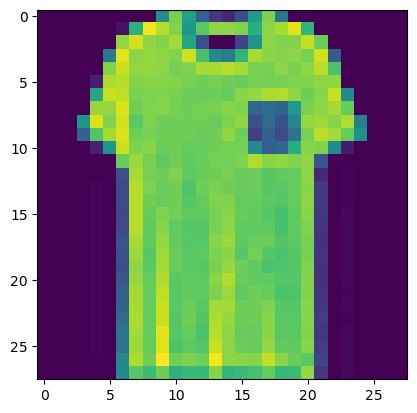

In [14]:
import matplotlib.pyplot as plt
plt.imshow(image.reshape(28, 28))
labellist = ['T恤','裤子','套衫','裙子','外套','凉鞋','汗衫','运 动鞋','包包','靴子']
print(f'这张图片对应的标签是{labellist[label]}')

In [15]:
class Classifiter(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)

        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.log_softmax(self.fc4(x), dim=1)


In [17]:
model = Classifiter()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Sgd(model.parameters(), lr=0.003)

epochs = 20

train_losses, test_losses = [], []

def train():
    print('开始训练')
    for e in range(epochs):
        running_loss = 0

        for images, labels in trainloader:


AttributeError: module 'torch.optim' has no attribute 'Sgd'